In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/AI_Summer_Training/data_files/AirPassengers.csv')

print(data.shape)
data.head()


(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
data.set_index('Month',inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


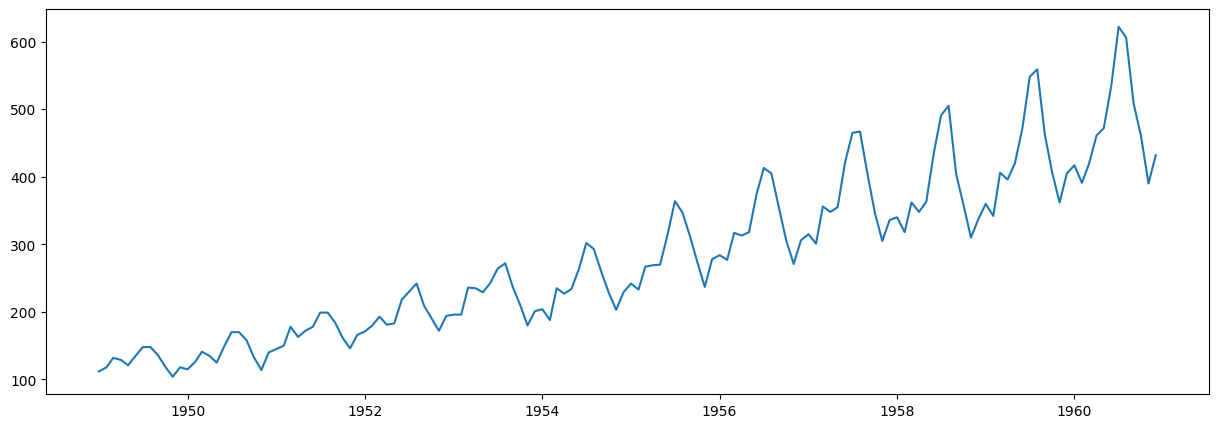

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(data['#Passengers'])
plt.show()

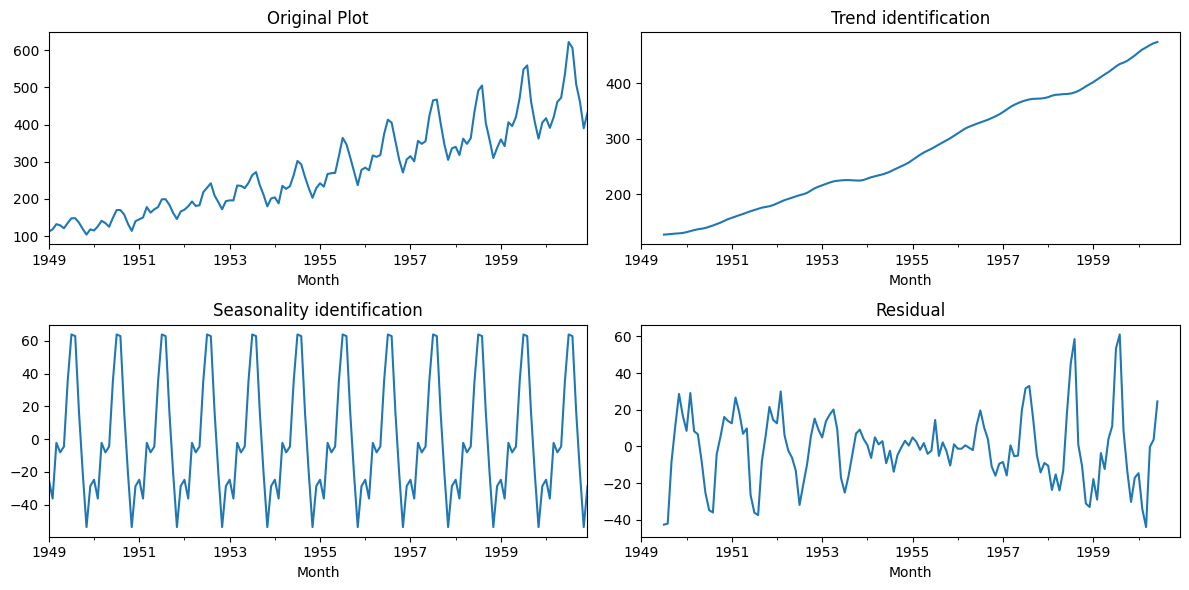

In [17]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st

tempData = data['#Passengers']
origData = tempData.copy()
var = seasonal.seasonal_decompose(tempData)

plt.figure(1,(12,6))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')

plt.tight_layout()
plt.show()


In [23]:
# i want to forecast the one year data
tempData = data['#Passengers']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for = sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

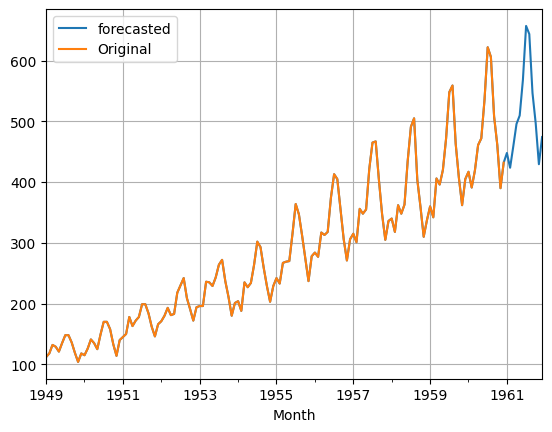

In [24]:
plt.figure(1)
tempData.plot(label='forecasted')
origData.plot(label='Original')
plt.legend()
plt.grid('on')

In [21]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [22]:
from pmdarima import auto_arima

auto_arima(tempData,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1099.510, Time=7.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1114.210, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1101.327, Time=0.92 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1101.882, Time=1.03 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1100.126, Time=2.14 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1099.694, Time=2.06 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=inf, Time=12.38 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1101.542, Time=3.52 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1099.946, Time=0.37 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1099.555, Time=2.24 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=1099.143, Time=4.07 sec
 ARIMA(1,1,2)(2,1,0)[12]             : AIC=1103.003, Time=1.67 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1097.290, Time=1.78 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1098.062, Time=0.70 sec
 ARIMA(2,1,1)(2,1,1)[12

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)